In [ ]:
# install scikit-fuzzy dulu karena tidak disertakan dari google colab
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 43.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=de7cf21d7cfe9101dc085e314c8c5450c14f2e434e5ceccbef1fd789791a10ad
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
# Import Library Pendukung
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [ ]:
# Menentukan Variabel Kasus
# dari kasus slide 59 pada PPT minggu kemarin (9 Juni 2023)


'''dibuat jadi 6000 supaya garis mendatarnya terlihat
syntax= np.arrange(
  batas x yaitu 0,
  nilai maksimum+1000/100 supaya terlihat
  garis mendatarnya, batas y yaitu 1) '''
permintaan=np.arange(0,6000,1)
persediaan=np.arange(0,700,1)
produksi=np.arange(0,8000,1)

In [ ]:
# Menentukan Range Himpunan Fuzzy
'''
sumbernya di ppt yg sama, slide 22 dan 41 (41 untuk grafiknya)
grafiknya berbentuk trapesium tidak sempurna,
dimana titik a dan b menyatu dengan sumbu y.

nilainya tetap mengacu yang di sumbu X
trapmf() merupakan fungsi trapesium dari skfuzzy
urutan di array adalah= [0=a, 0=b, c=1000, d=5000].
 '''
permintaan_turun=fuzz.trapmf(permintaan,\
        [0,0,1000,5000])

'''  a=1000, b=5000, c dan d tidak ada/menyatu dengan sumbu y,
tapi menggunakan nilai 6000, yaitu batasan atas
yang sudah ditetapkan (di sumbu x)'''
permintaan_naik=fuzz.trapmf(permintaan,\
        [1000,5000,6000,6000])
'''  '''
persediaan_sedikit=fuzz.trapmf(persediaan,\
        [0,0,100,600])

'''  '''
persediaan_banyak=fuzz.trapmf(persediaan,\
        [100,600,700,700])

produksi_berkurang=fuzz.trapmf(produksi,\
        [0,0,2000,7000])
produksi_bertambah=fuzz.trapmf(produksi,\
        [2000,7000,8000,8000])

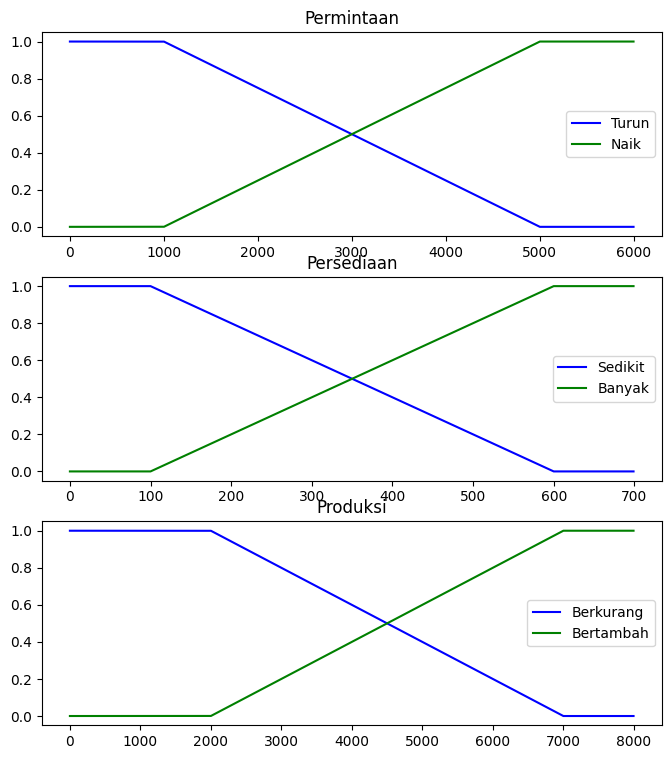

In [ ]:
# Membuat Grafik Himpunan Fuzzy
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8,9))

ax0.plot(permintaan,permintaan_turun,'b', linewidth=1.5,\
         label='Turun')
ax0.plot(permintaan,permintaan_naik, 'g', linewidth=1.5,\
         label='Naik')
ax0.set_title('Permintaan')
ax0.legend()


ax1.plot(persediaan,persediaan_sedikit,'b', linewidth=1.5,\
         label='Sedikit')
ax1.plot(persediaan,persediaan_banyak, 'g', linewidth=1.5,\
         label='Banyak')
ax1.set_title('Persediaan')
ax1.legend()


ax2.plot(produksi,produksi_berkurang,'b', linewidth=1.5,\
         label='Berkurang')
ax2.plot(produksi,produksi_bertambah, 'g', linewidth=1.5,\
         label='Bertambah')
ax2.set_title('Produksi')
ax2.legend()


Bagian kedua: derajat keanggotaan
(lihat ppt slide 41)

In [ ]:
# Menginputkan Nilai Kasus
minta=4000
sedia=300

In [ ]:
# Menentukan Derajat Keanggotaan
x=[]
# untuk nilai x[0]
x.append(fuzz.interp_membership(permintaan,\
        permintaan_turun, minta))

# untuk nilai x[1]
x.append(fuzz.interp_membership(permintaan,\
        permintaan_naik, minta))

y=[]
y.append(fuzz.interp_membership(persediaan,\
        persediaan_sedikit, sedia))
y.append(fuzz.interp_membership(persediaan,\
        persediaan_banyak, sedia))

print("Derajat Keanggotaan Permintaan")
if x[0]>0:
  print("Turun x[0]: "+str(x[0]))
if x[1]>0:
  print("Naik x[1]: "+str(x[1]))

print("Derajat Keanggotaan Persediaan")
if y[0]>0:
  print("Sedikit y[0]: "+str(y[0]))
if y[1]>0:
  print("Banyak y[1]: "+str(y[1]))

Derajat Keanggotaan Permintaan
Turun x[0]: 0.25
Naik x[1]: 0.75
Derajat Keanggotaan Persediaan
Sedikit y[0]: 0.6
Banyak y[1]: 0.4


In [ ]:
# Menentukan Rule Base dan Inferensi Tsukamoto

''' lihat di slide 44-46 '''
a1=np.fmin(x[0],y[1])
print("Nilai 1=",x[0]," dan Nilai 2=",y[1])
print("Nilai Alpa Predikat 1=",a1)

''' rumus awalnya:
(7000-z)/(7000-2000)=a1

jika pindah ruas:
(7000-z)/(5000)=a1
7000-z=a1 * 5000
7000=a1 * 5000 + z
7000-(a1 * 5000)=z '''
z1=7000-(a1*5000)
print("Nilai z1=",z1)

a2=np.fmin(x[0],y[0])
print("Nilai 1=",x[0]," dan Nilai 2=",y[0])
print("Nilai Alpa Predikat 2=",a2)
z2=7000-(a2*5000)
print("Nilai z2=",z2)

a3=np.fmin(x[1],y[1])
print("Nilai 1=",x[1]," dan Nilai 2=",y[1])
print("Nilai Alpa Predikat 3=",a3)
z3=(a3*5000)+2000
print("Nilai z3=",z3)

a4=np.fmin(x[1],y[0])
print("Nilai 1=",x[1]," dan Nilai 2=",y[0])
print("Nilai Alpa Predikat 4=",a4)
z4=(a4*5000)+2000
print("Nilai z4=",z4)

Nilai 1= 0.25  dan Nilai 2= 0.4
Nilai Alpa Predikat 1= 0.25
Nilai z1= 5750.0
Nilai 1= 0.25  dan Nilai 2= 0.6
Nilai Alpa Predikat 2= 0.25
Nilai z2= 5750.0
Nilai 1= 0.75  dan Nilai 2= 0.4
Nilai Alpa Predikat 3= 0.4
Nilai z3= 4000.0
Nilai 1= 0.75  dan Nilai 2= 0.6
Nilai Alpa Predikat 4= 0.6
Nilai z4= 5000.0


In [27]:
# metode sugeno
a1=np.fmin(x[0],y[1])
print("Nilai 1=",x[0]," dan Nilai 2=",y[1])
print("Nilai Alpa Predikat 1=",a1)

z1_sugeno=minta-sedia #4000-300=3700
print("Nilai z1=",z1_sugeno)

a2=np.fmin(x[0],y[0])
print("Nilai 1=",x[0]," dan Nilai 2=",y[0])
print("Nilai Alpa Predikat 2=",a2)

# z2, rumusnya produksi=permintaan
z2_sugeno=minta # 4000=4000
print("Nilai z2=",z2_sugeno)

a3=np.fmin(x[1],y[1])
print("Nilai 1=",x[1]," dan Nilai 2=",y[1])
print("Nilai Alpa Predikat 3=",a3)

# z3, rumusnya produksi=permintaan
z3_sugeno=minta # 4000=4000
print("Nilai z3=",z3_sugeno)

a4=np.fmin(x[1],y[0])
print("Nilai 1=",x[1]," dan Nilai 2=",y[0])
print("Nilai Alpa Predikat 4=",a4)

# z4, rumusnya produksi=1.25*permintaan-persediaan
z4_sugeno=1.25*minta-sedia
print("Nilai z4=",z4_sugeno)

Nilai 1= 0.25  dan Nilai 2= 0.4
Nilai Alpa Predikat 1= 0.25
Nilai z1= 3700
Nilai 1= 0.25  dan Nilai 2= 0.6
Nilai Alpa Predikat 2= 0.25
Nilai z2= 4000
Nilai 1= 0.75  dan Nilai 2= 0.4
Nilai Alpa Predikat 3= 0.4
Nilai z3= 4000
Nilai 1= 0.75  dan Nilai 2= 0.6
Nilai Alpa Predikat 4= 0.6
Nilai z4= 4700.0


In [28]:
''' slide 50 '''

# Defuzzifikasi
z=(a1*z1+a2*z2+a3*z3+a4*z4)/(a1+a2+a3+a4)
print("Jumlah Produksi PT ABC (Tsukamoto) = ", z)

z_sugeno=(a1*z1_sugeno+a2*z2_sugeno+a3*z3_sugeno+a4*z4_sugeno)/(a1+a2+a3+a4)
print("Jumlah Produksi PT ABC (Sugeno) = ", z_sugeno)

Jumlah Produksi PT ABC (Tsukamoto) =  4983.333333333333
Jumlah Produksi PT ABC (Sugeno) =  4230.0


Metode Mamdani: Kasus Penyiraman Air pada kebun

In [15]:
# Metode Mamdani
from skfuzzy import control as ctrl

In [16]:
# Definisikan Semesta

# Antecedent/anteseden adalah IF (input)
# Consequent/konsekuen adalah THEN (output)
suhu_udara=ctrl.Antecedent(np.arange(-10,50,1),'Suhu Udara')
kelembapan_tanah=ctrl.Antecedent(np.arange(0,70,1),\
                          'Kelembapan Tanah')
durasi_penyiraman=ctrl.Consequent(np.arange(0,90,1),\
                          'Durasi Penyiraman')

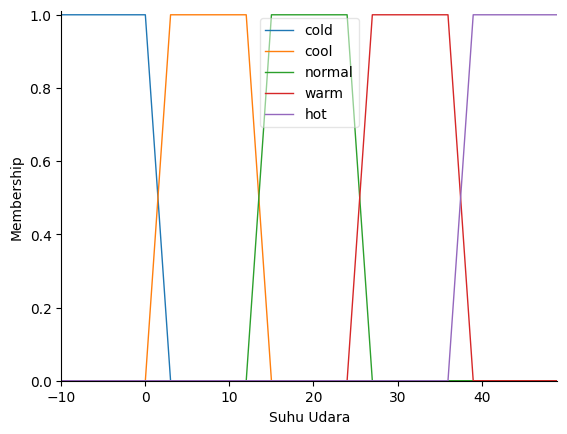

In [17]:
# Membership Function
# Suhu
suhu_udara['cold']=fuzz.trapmf(suhu_udara.universe,\
                               [-10,-10,0,3])
suhu_udara['cool']=fuzz.trapmf(suhu_udara.universe,\
                               [0,3,12,15])
suhu_udara['normal']=fuzz.trapmf(suhu_udara.universe,\
                               [12,15,24,27])
suhu_udara['warm']=fuzz.trapmf(suhu_udara.universe,\
                               [24,27,36,39])
suhu_udara['hot']=fuzz.trapmf(suhu_udara.universe,\
                               [36,39,50,50])
suhu_udara.view()


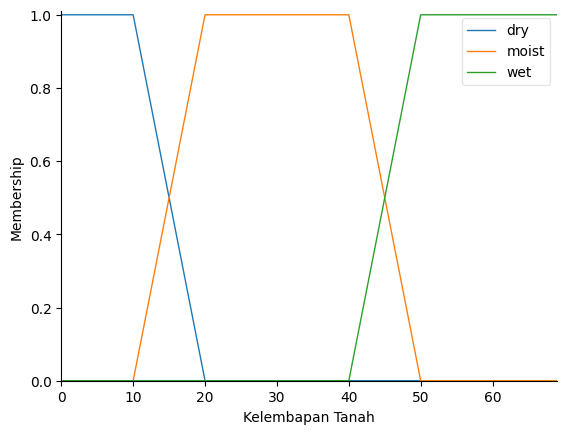

In [18]:
# Kelembapan
kelembapan_tanah['dry']=fuzz.trapmf(kelembapan_tanah.universe,\
                          [0,0,10,20])
kelembapan_tanah['moist']=fuzz.trapmf(kelembapan_tanah.universe,\
                          [10,20,40,50])
kelembapan_tanah['wet']=fuzz.trapmf(kelembapan_tanah.universe,\
                          [40,50,70,70])
kelembapan_tanah.view()

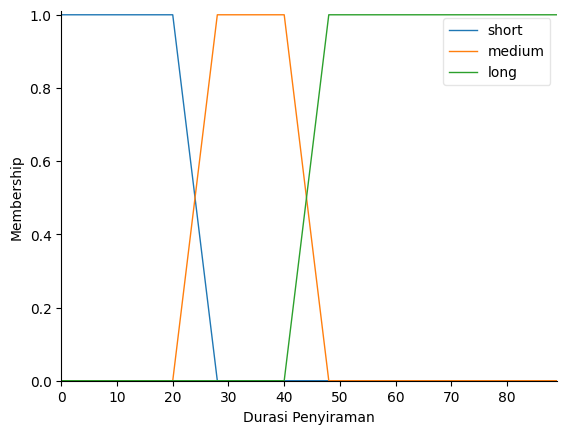

In [19]:
# Durasi
durasi_penyiraman['short']=fuzz.trapmf(\
          durasi_penyiraman.universe,[0,0,20,28])
durasi_penyiraman['medium']=fuzz.trapmf(\
          durasi_penyiraman.universe,[20,28,40,48])
durasi_penyiraman['long']=fuzz.trapmf(\
          durasi_penyiraman.universe,[40,48,90,90])
durasi_penyiraman.view()


In [20]:
# Rule yang digunakan
rule1=ctrl.Rule(suhu_udara['warm'] & kelembapan_tanah['dry'],\
                durasi_penyiraman['long'])
rule2=ctrl.Rule(suhu_udara['warm'] & kelembapan_tanah['moist'],\
                durasi_penyiraman['medium'])
rule3=ctrl.Rule(suhu_udara['hot'] & kelembapan_tanah['dry'],\
                durasi_penyiraman['long'])
rule4=ctrl.Rule(suhu_udara['hot'] & kelembapan_tanah['moist'],\
                durasi_penyiraman['medium'])

In [21]:
# Masukkan Rule ke system Fuzzy
penyiraman_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4])

In [22]:
# Persiapan Simulasi Fuzzy Mamdani
simulasi_durasi_penyiraman=ctrl.ControlSystemSimulation(\
                            penyiraman_ctrl)

In [23]:
# Inputan Fuzzi Mamdani
simulasi_durasi_penyiraman.input['Suhu Udara']=37
simulasi_durasi_penyiraman.input['Kelembapan Tanah']=12
simulasi_durasi_penyiraman.compute()

Durasi yang Diperlukan Adalah  61.78541886626943  Menit


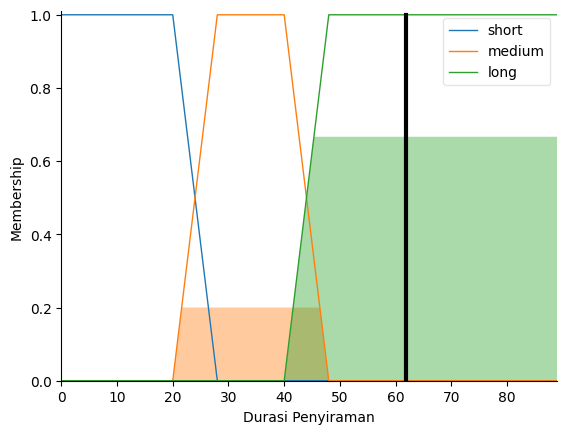

In [24]:
print("Durasi yang Diperlukan Adalah ",\
      simulasi_durasi_penyiraman.output['Durasi Penyiraman'],\
      " Menit")
durasi_penyiraman.view(sim=simulasi_durasi_penyiraman)